In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the data from csv file
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

In [5]:
# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

In [6]:
#printing null values
missing_values = data.isnull().sum()

missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Calculate mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

In [8]:
# Calculate population mean and highest Glucose values
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

In [9]:
# Display the statistics
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


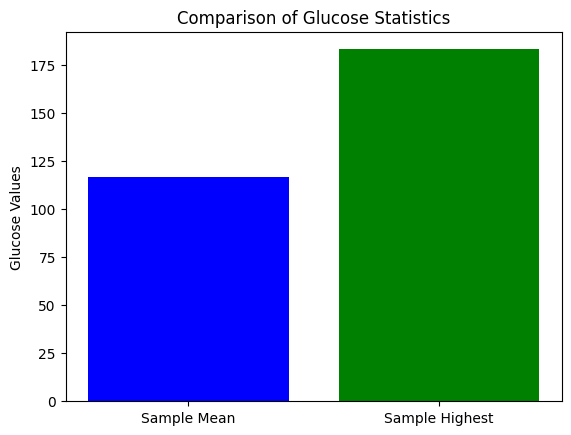

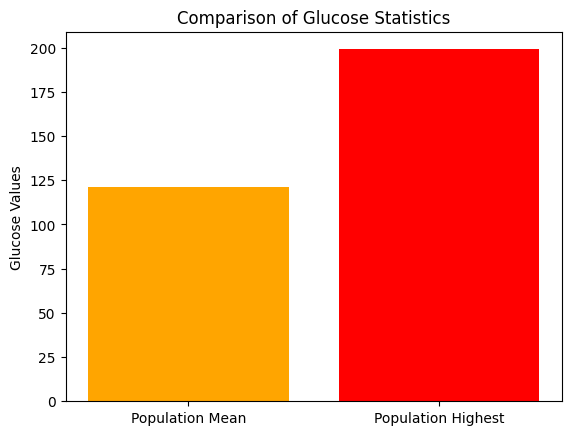

In [11]:
# Create a bar chart for comparing Sample Mean & Sample Highest
labels = ['Sample Mean', 'Sample Highest']
values = [sample_mean_glucose, sample_highest_glucose]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

# Create a bar chart for Population Mean & Population Highest
labels_1= ['Population Mean', 'Population Highest']
values_1= [population_mean_glucose, population_highest_glucose]
plt.bar(labels_1, values_1, color=['orange', 'red'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

b)Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [12]:
# Calculate the 98th percentile of BMI for the sample
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Calculate the 98th percentile of BMI for the population
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

In [13]:
# Display the percentiles
print("Sample 98th Percentile BMI:", sample_98th_percentile_bmi)
print("Population 98th Percentile BMI:", population_98th_percentile_bmi)

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


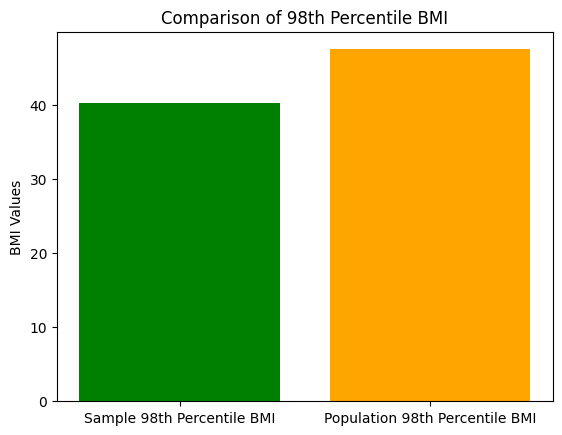

In [14]:
# Create a bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

plt.bar(labels, values, color=['green', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings

In [15]:
# Number of bootstrap samples and size of each sample
num_samples = 500
sample_size = 150

In [16]:
# Initialize empty arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [17]:
# Perform bootstrap sampling
for i in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

    # Calculate mean, standard deviation, and 95th percentile for the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)

In [18]:
# Calculate population statistics for BloodPressure
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_95_bp = np.percentile(data['BloodPressure'], 95)

In [19]:
# Display the population statistics
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 95th Percentile BloodPressure:", population_percentile_95_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 95th Percentile BloodPressure: 90.0


In [21]:
# Calculate mean, standard deviation, and 95th percentile for the bootstrap statistics
bootstrap_mean_mean = np.mean(bootstrap_means)
bootstrap_mean_std_dev = np.mean(bootstrap_std_devs)
bootstrap_mean_percentile_95 = np.mean(bootstrap_percentiles)

In [22]:
# Display the bootstrap statistics
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 95th Percentile BloodPressure:", bootstrap_mean_percentile_95)


Bootstrap Mean BloodPressure: 69.17696
Bootstrap Standard Deviation BloodPressure: 19.01902467947537
Bootstrap 95th Percentile BloodPressure: 91.12039999999996


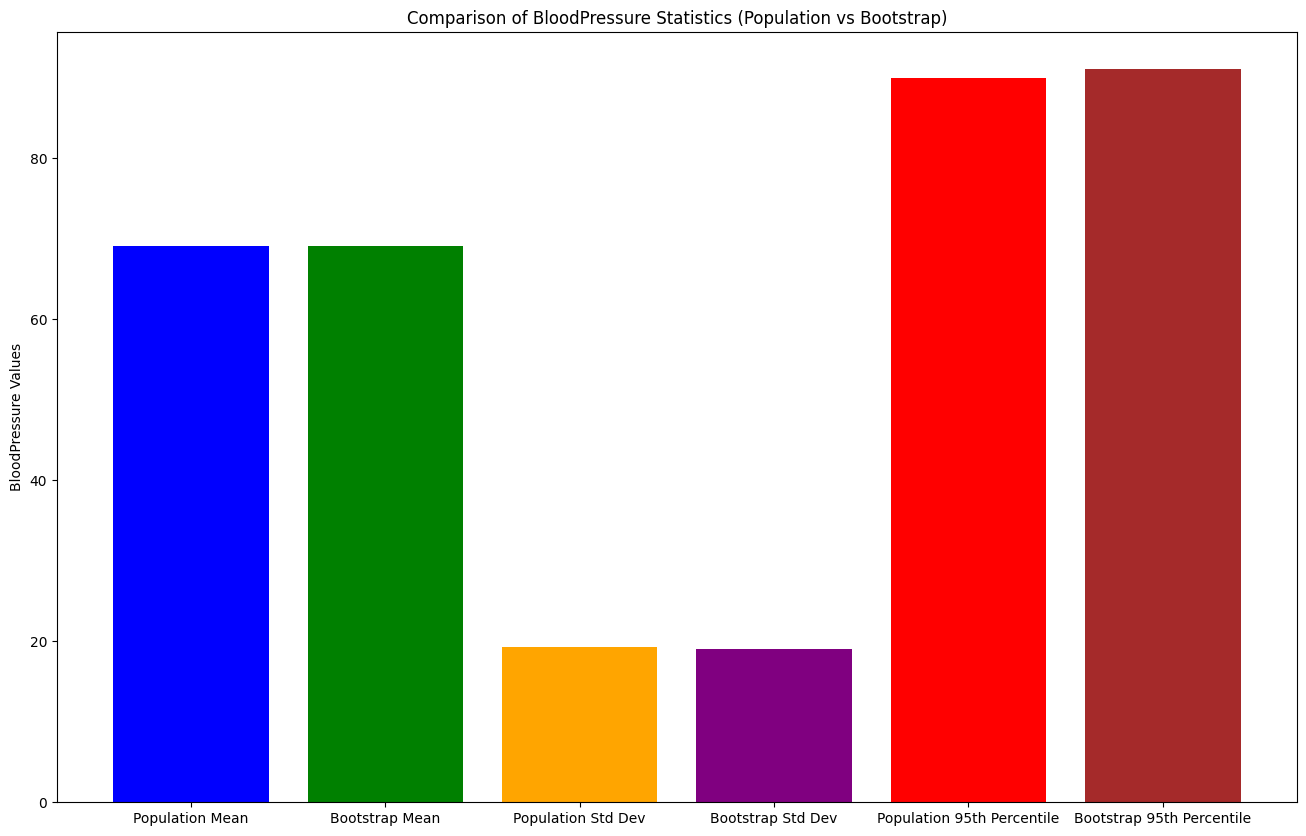

In [35]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [population_mean_bp, bootstrap_mean_mean, population_std_dev_bp, bootstrap_mean_std_dev, population_percentile_95_bp, bootstrap_mean_percentile_95]

plt.bar(labels, values, color=['blue', 'green', 'orange', 'purple', 'red', 'brown'])
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()
